HAND WRITTEN DIGIT RECOGNIZING AI MNIST MODEL 

LIBRARIES

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

LOAD DATASET

In [2]:
train_csv = "C:\\Code2\\dataset\\train.csv"
test_csv = "C:\\Code2\\dataset\\test.csv"
train_ds = pd.read_csv(train_csv)
test_ds = pd.read_csv(test_csv)

PROCESS DATASET

In [3]:
y_train = train_ds['label'].astype('float32')
x_train = train_ds.drop(['label'], axis=1).astype('int32')
x_predict = test_ds.astype('float32')
x_train = x_train/255
x_predict = x_predict/255
x_train = x_train.values.reshape(-1,28,28,1)
x_predict = x_predict.values.reshape(-1,28,28,1)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state=101)
y_train_cat = to_categorical(y_train, num_classes = 10)

VISUALIZE DATASET

Label examples:
0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

Image examples:


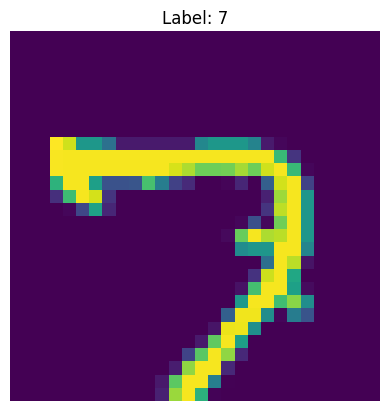

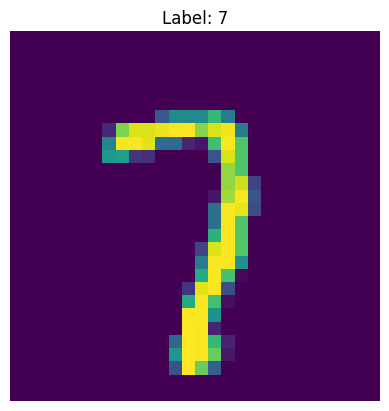

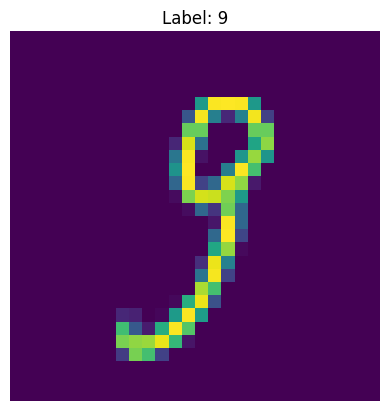

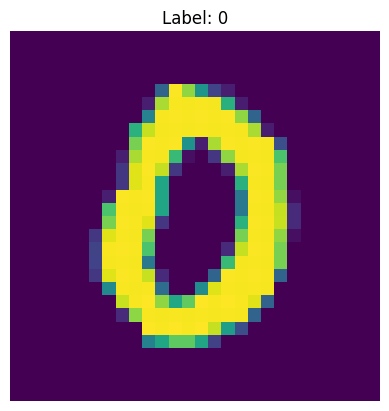

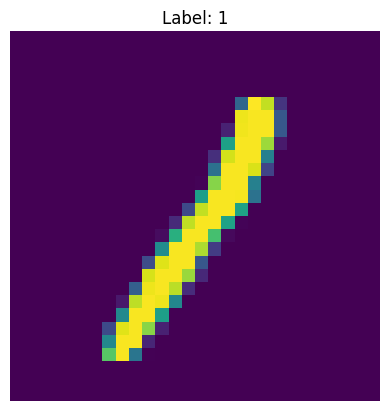

In [4]:
print("Label examples:")
print(train_ds['label'].head())
print("\nImage examples:")
for i in range(5):
    plt.imshow(x_train[i][:,:,0])
    plt.title(f"Label: {y_train_cat[i].argmax()}")
    plt.axis('off')
    plt.show()

BUILD AND TRAIN MODEL

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1050/1050 [==============================] - 7s 4ms/step - loss: 0.3687 - accuracy: 0.8939
Epoch 2/30
1050/1050 [==============================] - 4s 3ms/step - loss: 0.1799 - accuracy: 0.9479
Epoch 3/30
1050/1050 [==============================] - 4s 3ms/step - loss: 0.1330 - accuracy: 0.9605
Epoch 4/30
1050/1050 [==============================] - 4s 3ms/step - loss: 0.1067 - accuracy: 0.9666
Epoch 5/30
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0873 - accuracy: 0.9734
Epoch 6/30
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0783 - accuracy: 0.9747
Epoch 7/30
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0667 - accuracy: 0.9787
Epoch 8/30
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0570 - accuracy: 0.9812
Epoch 9/30
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0493 - accuracy: 0.9835
Epoch 10/30
1050/1050 [==============================] - 4s 4ms/step - loss: 0.045

EVALUATE MODEL

In [6]:
print("\nModel evaluation:")
model_loss, model_acc = model.evaluate(x_test,  y_test)
print(f"Loss: {model_loss:.4f}, Accuracy: {model_acc:.4f}")


Model evaluation:
263/263 [==============================] - 1s 2ms/step - loss: 0.1115 - accuracy: 0.9767
Loss: 0.1115, Accuracy: 0.9767


GENERATE PREDICTIONS

In [7]:
y_predict = model.predict(x_predict)
y_predict = np.argmax(y_predict,axis=1)
my_submission = pd.DataFrame({'ImageId': list(range(1, len(y_predict)+1)), 'Label': y_predict})
my_submission.to_csv('submission.csv', index=False)

875/875 [==============================] - 2s 2ms/step


VISUALIZE PREDICTIONS


Prediction examples:


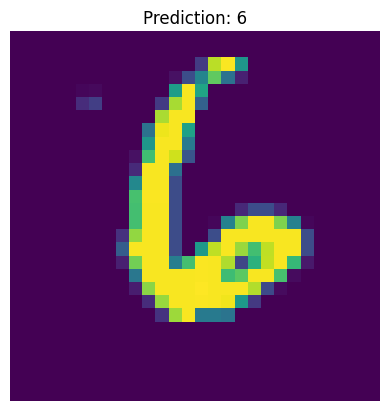

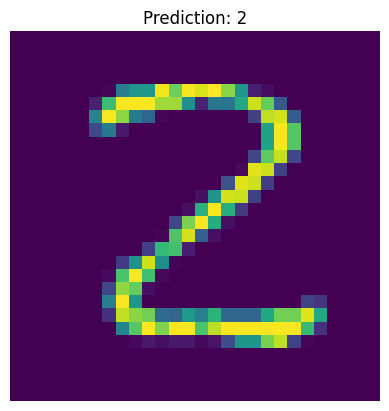

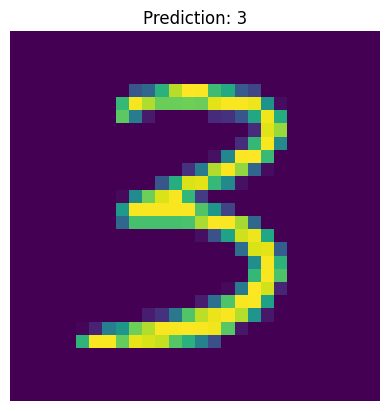

In [8]:
print("\nPrediction examples:")
y_pred_cat = to_categorical(y_predict, num_classes=10)
indices = [300, 90, 9]
for i in indices:
    plt.imshow(x_predict[i][:,:,0])
    plt.title(f"Prediction: {y_pred_cat[i].argmax()}")
    plt.axis('off')
    plt.show()